(160, 320, 3)

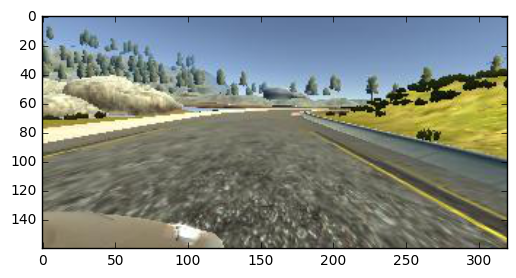

In [1]:
# load in image data and driving angle data
from scipy.misc import imread
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
test = imread("data/IMG/right_2016_12_01_13_46_38_947.jpg")
plt.imshow(test)
test.shape
# split data into training and validation
# define network architecture
# train the model
# test on the simulator

In [2]:
from scipy.misc import imresize
def image_compression(image):
    height, width, depth = image.shape
    region = image[int(height / 3):int(height * 4 / 5)]
    return imresize(region, (32, 64))
    # return imresize(image, (66, 200))

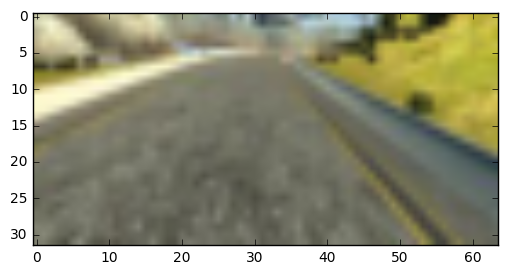

In [3]:
plt.imshow(image_compression(test))

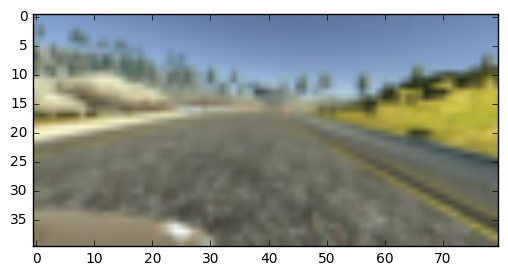

In [4]:
from scipy.misc import imresize
test2 = imresize(test, (40, 80))
plt.imshow(test2)

In [5]:
import pandas as pd
import numpy as np


In [6]:
log = pd.read_csv("data/driving_log.csv")

In [7]:
log.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


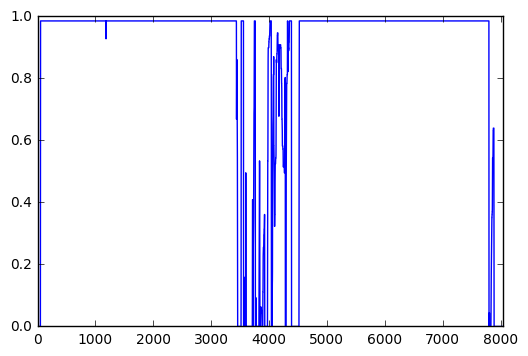

In [8]:
log["throttle"].plot()

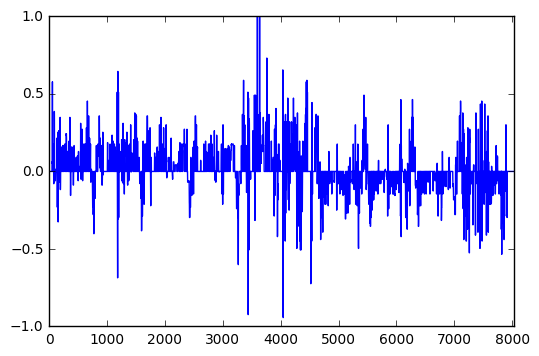

In [9]:
log["steering"].plot()

In [10]:
angles = np.absolute(log["steering"])

In [11]:
np.histogram(np.array(angles))

(array([5923, 1254,  461,  250,  104,   23,   11,    3,    1,    6]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

In [12]:
center = log[["center", "steering"]]

In [13]:
center.head()

,center,steering
0,IMG/center_2016_12_01_13_30_48_287.jpg,0.0
1,IMG/center_2016_12_01_13_30_48_404.jpg,0.0
2,IMG/center_2016_12_01_13_31_12_937.jpg,0.0
3,IMG/center_2016_12_01_13_31_13_037.jpg,0.0
4,IMG/center_2016_12_01_13_31_13_177.jpg,0.0


In [14]:
left = log[["left", "steering"]]
left["steering"] = left["steering"] + 0.25


/Users/michael/apps/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
right = log[["right", "steering"]]
right["steering"] = right["steering"] - 0.25

/Users/michael/apps/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
right.columns = ["center", "steering"]
left.columns = ["center", "steering"]

In [17]:
log_data = pd.concat([center, left, right])

In [18]:
log_data.count()

center      24108
steering    24108
dtype: int64

In [19]:
y_train = np.array(log_data["steering"])

In [20]:
from scipy.misc import imresize

X_train = log_data["center"].apply(lambda x: image_compression(imread("data/"+x.strip())))

In [21]:
X_train = list(X_train)
X_train = np.array(X_train)

In [22]:
X_train.shape

(24108, 32, 64, 3)

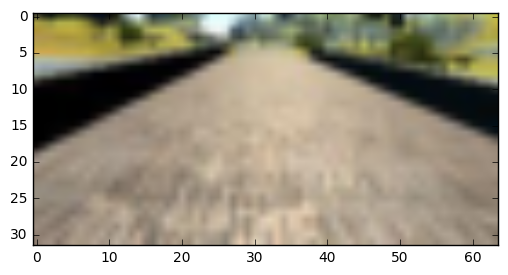

In [23]:
plt.imshow(X_train[0])

In [24]:
import scipy

In [25]:
np.random.randint(-20, 20, size = 1)

array([7])

In [26]:
# temp = scipy.ndimage.interpolation.shift(X_train[0], [0, -20, 0], output=None, order=3, mode='nearest')
# plt.imshow(temp.astype(np.uint8))

In [27]:
from sklearn.model_selection import train_test_split
X_train_split, X_test, y_train_split, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state = 0)
y_train_split = y_train_split * 1.3
X_test = X_test.astype(np.float64)
X_test = X_test / 255

In [28]:
## generate new data
import math
def shift_image(X_train, y_train, batch_size):
    num_sample = X_train.shape[0]
    high_angle_selector = np.absolute(y_train) > 0.3
    X_train_high_angle, y_train_high_angle = X_train[high_angle_selector], y_train[high_angle_selector]
    num_sample_high_angle = X_train_high_angle.shape[0]
    while True:
        straight_or_angle = np.random.randint(0, 9)
        if straight_or_angle == 0:
            
            selector = np.random.randint(0, high=num_sample, size=batch_size)

            X_temp, y_temp = X_train[selector], y_train[selector]
            
            yield X_temp, y_temp
        elif straight_or_angle > 0:
            selector = np.random.randint(0, high=num_sample_high_angle, size=batch_size)

            X_temp, y_temp = X_train_high_angle[selector], y_train_high_angle[selector]
            
            yield X_temp, y_temp
        
            
            
    
    
    

In [29]:

datagen = shift_image(X_train_split, y_train_split, 10)

In [30]:
temp_batch1 = next(datagen)

0.325


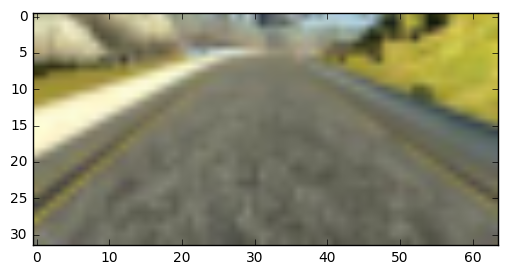

In [31]:
i = 5
plt.imshow(temp_batch1[0][i])
print(temp_batch1[1][i])

In [32]:
from keras.preprocessing.image import ImageDataGenerator


# this function is from  https://chatbotslife.com/using-augmentation-to-mimic-human-driving-496b569760a9#.jqnd5bnzd
def augment_brightness(image):
    image = image.astype(np.uint8)
    image1 = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    random_bright = .25 + np.random.uniform()
    # print(random_bright)
    image1[:, :, 2] = image1[:, :, 2] * random_bright
    image1 = cv2.cvtColor(image1, cv2.COLOR_HSV2RGB)
    return image1

# this function is from https://chatbotslife.com/using-augmentation-to-mimic-human-driving-496b569760a9#.jqnd5bnzd
import cv2
def add_random_shadow(image):
    image = image.astype(np.uint8)
    top_y = 32*np.random.uniform()
    top_x = 0
    bot_x = 16
    bot_y = 32*np.random.uniform()
    image_hls = cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
    shadow_mask = 0*image_hls[:,:,1]
    X_m = np.mgrid[0:image.shape[0],0:image.shape[1]][0]
    Y_m = np.mgrid[0:image.shape[0],0:image.shape[1]][1]
    shadow_mask[((X_m-top_x)*(bot_y-top_y) -(bot_x - top_x)*(Y_m-top_y) >=0)]=1
    #random_bright = .25+.7*np.random.uniform()
    if np.random.randint(2)==1:
        random_bright = .5
        cond1 = shadow_mask==1
        cond0 = shadow_mask==0
        if np.random.randint(2)==1:
            image_hls[:,:,1][cond1] = image_hls[:,:,1][cond1]*random_bright
        else:
            image_hls[:,:,1][cond0] = image_hls[:,:,1][cond0]*random_bright
    image = cv2.cvtColor(image_hls,cv2.COLOR_HLS2RGB)
    return image
def normalize(image):
    return image / 255



Using TensorFlow backend.


In [33]:
test_image = X_train[0:10]

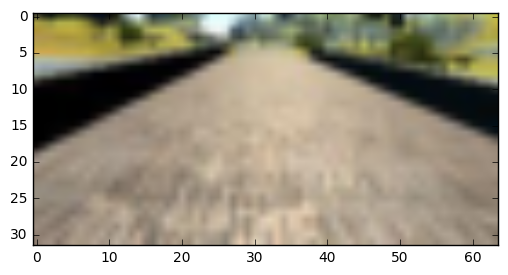

In [34]:
plt.imshow(test_image[0])

In [35]:
BATCH_SIZE = 128
batch = shift_image(X_train_split, y_train_split, BATCH_SIZE)

In [36]:

datagen = ImageDataGenerator(
      
       
        zoom_range=0.1,

        fill_mode='nearest')
batch_gen = datagen.flow(X_train_split, y_train_split, batch_size=BATCH_SIZE, shuffle=True)


In [37]:


def image_process(batch):
    while True:
        #x1, y1 = next(batch)
        #x2, y2 = next(batch)
        #x3, y3 = next(batch)
        #x4, y4 = next(batch)
        #x5, y5 = next(batch)
        #x6, y6 = next(batch)
        #x7, y7 = next(batch)
        #x8, y8 = next(batch)
        #x = np.vstack((x1, x2, x3, x4, x5, x6, x7, x8))
        #y = np.hstack((y1, y2, y3, y4, y5, y6, y7, y8))
        x, y = next(batch)
        num_sample = x.shape[0]
        for i in range(num_sample):
            image = x[i]
            brightness_augmented = augment_brightness(image)
            random_shadow_added = add_random_shadow(brightness_augmented)
            x[i] = normalize(random_shadow_added)
        yield x, y
        # yield x, y
        

In [46]:
batch2 = image_process(batch_gen)

In [39]:
test1 = X_train[0]
test2 = X_train[1]

In [40]:
import keras
print(keras.__version__)

1.2.0


In [41]:
type(next(batch2))

tuple

In [42]:
test = next(batch2)
test[0].shape

(128, 32, 64, 3)

from keras.layers import Input, Flatten, Dense
from keras.models import Model

input_shape = (224, 224, 3)
inp = Input(shape=input_shape)
x = Flatten()(inp)
x = Dense(1)(x)
model = Model(inp, x)
model.compile(optimizer='adam', loss='mean_squared_error')


train_data, train_label = next(batch2)
# train model
model.fit(train_data, train_label, BATCH_SIZE, nb_epoch = 5, verbose=1)

# model.fit(X_train, y_train, nb_epoch=FLAGS.epochs, batch_size=FLAGS.batch_size, validation_data=(X_val, y_val), shuffle=True)



In [43]:
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.models import Sequential

from keras.regularizers import l2, activity_l2

input_shape = (32, 64, 3)
model = Sequential()


model.add(Convolution2D(24, 3, 3,
                        border_mode='valid',
                        input_shape=input_shape))

model.add(Convolution2D(36, 3, 3, border_mode="valid"))
model.add(Activation("relu"))
model.add(Convolution2D(48, 3, 3, border_mode="valid", subsample=(2, 2)))
model.add(Activation("relu"))
model.add(Convolution2D(64, 3, 3, border_mode="valid", subsample=(2, 2)))
model.add(Activation("relu"))
# model.add(Dropout(0.5))
# model.add(Dense(64, input_dim=64, W_regularizer=l2(0.01), activity_regularizer=activity_l2(0.01)))
model.add(Flatten())
model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("relu"))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [44]:


total_batches = 1000
batch_counter = 0


from keras.models import load_model

model_file = "bc1_model.h5"
# model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
# model = load_model('my_model.h5')
import os.path
if os.path.exists(model_file):
    print("model loaded")
    model = load_model(model_file)
while batch_counter < 10000:
    train_data, train_label = next(batch2)

   
    if batch_counter % 20 == 0:   
        model.fit(train_data, train_label, BATCH_SIZE * 100, nb_epoch = 1, verbose = 2, 
                  validation_data=(X_test, y_test), sample_weight = np.absolute(train_label) + 0.1)
        model.save(model_file)
        print("model saved")

    else:
        model.fit(train_data, train_label, BATCH_SIZE * 100, nb_epoch = 5, verbose=0, 
                  sample_weight = np.absolute(train_label) + 0.1)
       
    batch_counter += 1
    
print("training done")
#model.add(Activation("relu"))
#model.add(Convolution2D(64, 3, 3, border_mode = "valid"))
#model.add(Dropout(0.5))

#model.add(Activation("relu"))
#model.add(Flatten())

#model.add(Dense(128))
#model.add(Activation('relu'))
#model.add(Dense(43))
#model.add(Activation('softmax'))


model loaded
Train on 128 samples, validate on 7956 samples
Epoch 1/1
31s - loss: 0.0212 - val_loss: 0.0381
model saved
Train on 128 samples, validate on 7956 samples
Epoch 1/1
31s - loss: 0.0151 - val_loss: 0.0301
model saved


KeyboardInterrupt: 

In [49]:


total_batches = 1000
batch_counter = 0


from keras.models import load_model

model_file = "bc1_model.h5"
# model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
# model = load_model('my_model.h5')
import os.path
if os.path.exists(model_file):
    print("model loaded")
    model = load_model(model_file)
  
model.fit_generator(batch_gen, BATCH_SIZE * 10, nb_epoch = 1, verbose = 2, 
                  validation_data=(X_test, y_test))
model.save(model_file)


    
print("training done")

model loaded
Epoch 1/1
18s - loss: 3.6968 - val_loss: 0.0582
training done


In [ ]:
## save architecture to json
from keras.models import load_model

model_file = "test.h5"
model_archi_file = "test.json"
model = load_model(model_file)
json_string = model.to_json()

with open(model_archi_file, "w") as text_file:
    text_file.write(json_string)

model.summary()
